# Validation Video Data

#### Imports

In [29]:
import polars as pl 
import matplotlib.pyplot as plt

#### Read Data

In [30]:
df = pl.read_parquet('data/video.ids.parquet')
df.head()


video_id,datetime,title,transcript
str,str,str,str
"""bZr2vhoXSy8""","""2025-02-08T18:10:05Z""","""I Trained FLUX.1 on My Face (P…","""flux is a state-of-the-art ima…"
"""QvxuR8uLPFs""","""2025-02-03T18:00:00Z""","""How to Build Customer Segments…","""although today's AI models are…"
"""W4s6b2ZM6kI""","""2025-01-31T22:38:22Z""","""Fine-tuning Multimodal Embeddi…","""multimodal embedding models br…"
"""hOLBrIjRAj4""","""2025-01-22T21:25:16Z""","""Fine-Tuning Text Embeddings Fo…","""embedding models represent tex…"
"""V1BR2tb_e8g""","""2025-01-13T21:10:47Z""","""My AI Development Setup (From …","""hey everyone I'm sha I just go…"


#### Sizes

In [31]:
print('Shape:', df.shape)
print('n unique rows:', df.n_unique())
for j in range(df.shape[-1]):
    print('n unique elements: (', df.columns[j], '):', df[:,j].n_unique() )

Shape: (124, 4)
n unique rows: 124
n unique elements: ( video_id ): 124
n unique elements: ( datetime ): 124
n unique elements: ( title ): 124
n unique elements: ( transcript ): 122


In [32]:
print('Total number of title characters:', sum(len(df['title'][i]) for i in range(len(df))))
print('Total number of transcript characters:', sum(len(df['transcript'][i]) for i in range(len(df))))

Total number of title characters: 6576
Total number of transcript characters: 1462250


In [33]:
len(df)


124

In [34]:
# Change datatime to Datetime dtype
df = df.with_columns(pl.col('datetime').cast(pl.Datetime))
df.head()

video_id,datetime,title,transcript
str,datetime[μs],str,str
"""bZr2vhoXSy8""",2025-02-08 18:10:05,"""I Trained FLUX.1 on My Face (P…","""flux is a state-of-the-art ima…"
"""QvxuR8uLPFs""",2025-02-03 18:00:00,"""How to Build Customer Segments…","""although today's AI models are…"
"""W4s6b2ZM6kI""",2025-01-31 22:38:22,"""Fine-tuning Multimodal Embeddi…","""multimodal embedding models br…"
"""hOLBrIjRAj4""",2025-01-22 21:25:16,"""Fine-Tuning Text Embeddings Fo…","""embedding models represent tex…"
"""V1BR2tb_e8g""",2025-01-13 21:10:47,"""My AI Development Setup (From …","""hey everyone I'm sha I just go…"


#### Character lengths

(array([ 3.,  5., 16., 22., 19., 30., 16.,  9.,  1.,  3.]),
 array([16. , 23.8, 31.6, 39.4, 47.2, 55. , 62.8, 70.6, 78.4, 86.2, 94. ]),
 <BarContainer object of 10 artists>)

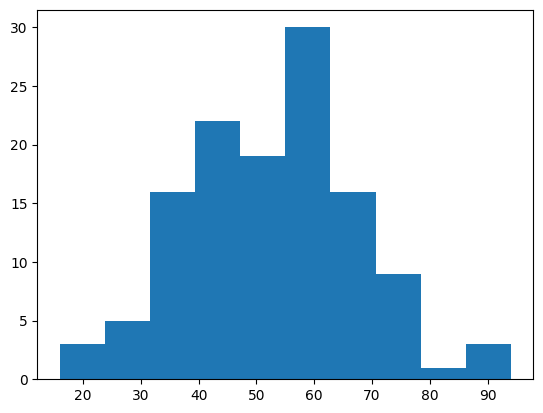

In [35]:
# length characters counts

plt.hist(df['title'].str.len_chars())


(array([45., 15., 21., 12., 17.,  7.,  2.,  2.,  2.,  1.]),
 array([3.00000e+00, 5.00610e+03, 1.00092e+04, 1.50123e+04, 2.00154e+04,
        2.50185e+04, 3.00216e+04, 3.50247e+04, 4.00278e+04, 4.50309e+04,
        5.00340e+04]),
 <BarContainer object of 10 artists>)

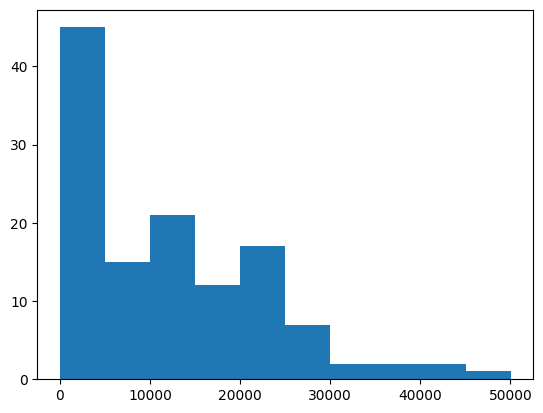

In [36]:
plt.hist(df['transcript'].str.len_chars())

#### Handling special strings 

In [37]:
print(df['title'][3])
print(df['transcript'][3])

Fine-Tuning Text Embeddings For Domain-specific Search (w/ Python)
embedding models represent text as semantically meaningful vectors although they can be readily used for countless use cases like retrieval or classification general purpose embedding models may have poor performance on domain specific tasks in this video I'll discuss how we can overcome this limitation via fine tuning I'll start with a highlevel overview of key Concepts and then walk through a concrete example of fine-tuning embeddings on AI J posts okay so let's talk about fine-tuning text embeddings this video is going to assume you already have a basic understanding of what text embeddings do but if you need a refresher I gave a beginner friendly introduction in a previous video so you can check that out if you need to so just jumping right into it Tex embeddings have become more popular these days with the widespread usage of so-called retrieval augmented generation or rag for short and the basic idea behind rag is

In [38]:
special_strings = ['&#39;', '&amp;', 'sha ']
special_string_replacements = ["'", "&", "Shaw "]

for i in range(len(special_strings)):
    df = df.with_columns(df['title'].str.replace(special_strings[i],special_string_replacements[i]).alias('title'))
    df = df.with_columns(df['transcript'].str.replace(special_strings[i], special_string_replacements[i]).alias('transcript'))

In [39]:
print(df['title'][3])
print(df['transcript'][3])

Fine-Tuning Text Embeddings For Domain-specific Search (w/ Python)
embedding models represent text as semantically meaningful vectors although they can be readily used for countless use cases like retrieval or classification general purpose embedding models may have poor performance on domain specific tasks in this video I'll discuss how we can overcome this limitation via fine tuning I'll start with a highlevel overview of key Concepts and then walk through a concrete example of fine-tuning embeddings on AI J posts okay so let's talk about fine-tuning text embeddings this video is going to assume you already have a basic understanding of what text embeddings do but if you need a refresher I gave a beginner friendly introduction in a previous video so you can check that out if you need to so just jumping right into it Tex embeddings have become more popular these days with the widespread usage of so-called retrieval augmented generation or rag for short and the basic idea behind rag is

#### Write data

In [42]:
df.write_parquet('data/video-transcripts.parquet)')
df.write_csv('data/video-transcripts.csv')
df.head()

video_id,datetime,title,transcript
str,datetime[μs],str,str
"""bZr2vhoXSy8""",2025-02-08 18:10:05,"""I Trained FLUX.1 on My Face (P…","""flux is a state-of-the-art ima…"
"""QvxuR8uLPFs""",2025-02-03 18:00:00,"""How to Build Customer Segments…","""although today's AI models are…"
"""W4s6b2ZM6kI""",2025-01-31 22:38:22,"""Fine-tuning Multimodal Embeddi…","""multimodal embedding models br…"
"""hOLBrIjRAj4""",2025-01-22 21:25:16,"""Fine-Tuning Text Embeddings Fo…","""embedding models represent tex…"
"""V1BR2tb_e8g""",2025-01-13 21:10:47,"""My AI Development Setup (From …","""hey everyone I'm Shaw I just g…"
